In [2]:
import os
import pandas as pd
base_dir = '/project/ajoshi_27/akrami/3D_lesion_DF/Data/SVRegTestData/T1_pre_v3/v4correctedN4_non_iso_cut/Test/t1'
t1_dir = '/project/ajoshi_27/akrami/3D_lesion_DF/Data/SVRegTestData/T1_pre_v3/v4correctedN4_non_iso_cut/Test/t1'
file_names = [name for name in os.listdir(t1_dir)]
df = pd.DataFrame(file_names, columns=["img_path"])
df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))
# Extract the ID (removing the '_t1.nii' part) and add it as a new column
df['img_name'] = df['img_path'].apply(lambda x: os.path.basename(x).replace('_t1.nii.gz', ''))
# Update the DataFrame to include a new column 'mask_path'
df['mask_path'] = df['img_path'].apply(lambda x: x.replace('t1', 'mask'))
df['age'] = 50
csv_file_path = "/project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/test_ofd.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")


DataFrame has been saved to /project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/test_ofd.csv


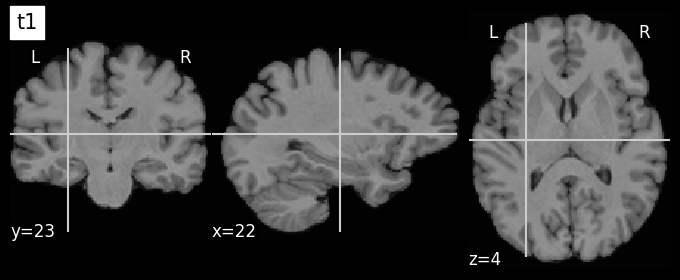

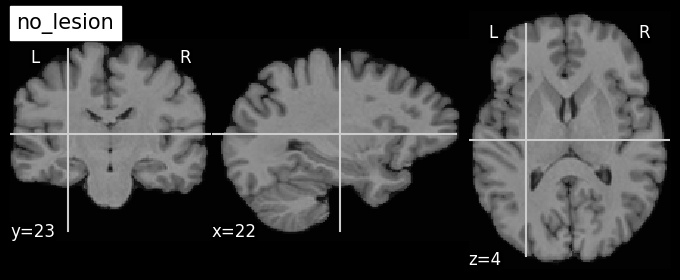

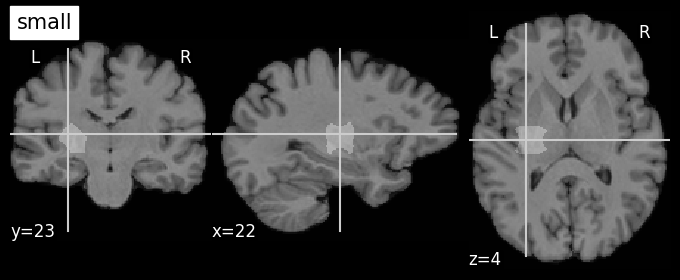

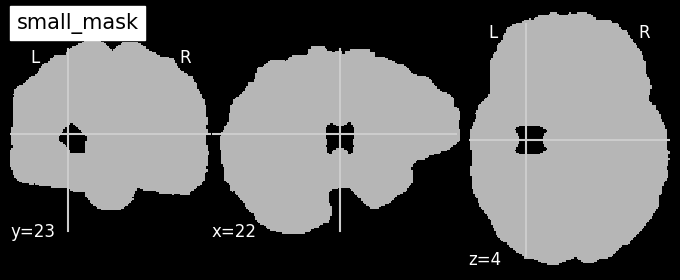

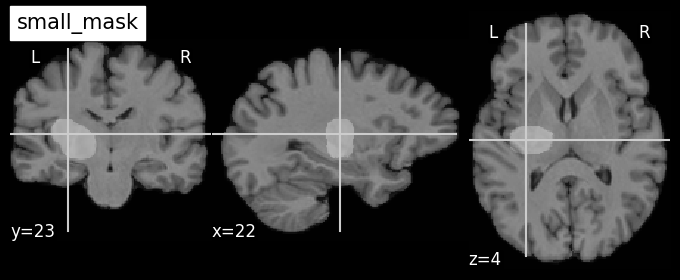

In [1]:
from nilearn.plotting import plot_anat
from nilearn.image import new_img_like,load_img
import nibabel as nib
from nibabel.processing import resample_from_to


mri = '/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/IXI031-Guys-0797_t1.nii.gz'
no_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/easy_case/mri_no_lesion.nii.gz'
small_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/easy_case/mri_initial_lesion.nii.gz'
mask = '/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/easy_case/lesion_small_mask.nii.gz'
large_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/easy_case/mri_expanded_lesion.nii.gz'

mri_img = nib.load(mri)
mri_no = nib.load(no_lesion)
small = nib.load(small_lesion)
small_mask = nib.load(mask)
mri_large =nib.load(large_lesion)


cross_hair = (22, 23, 4)
plot_anat(mri_img, title='t1', cut_coords=cross_hair)
plot_anat(mri_no , title='no_lesion', cut_coords=cross_hair)
plot_anat(small , title='small', cut_coords=cross_hair)
plot_anat(small_mask , title='small_mask', cut_coords=cross_hair)
plot_anat(mri_large , title='small_mask', cut_coords=cross_hair)


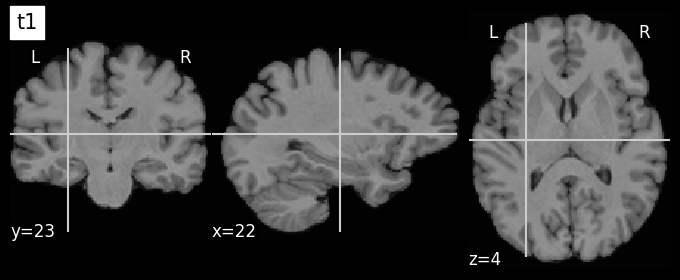

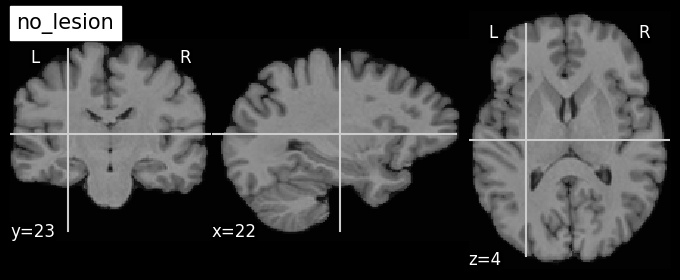

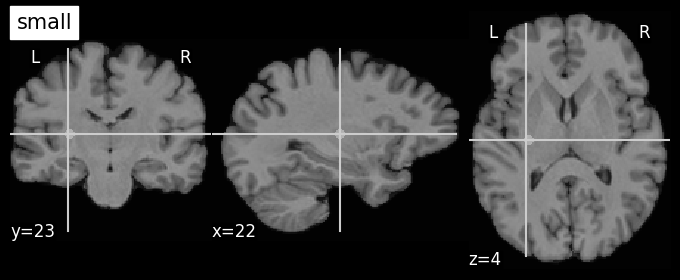

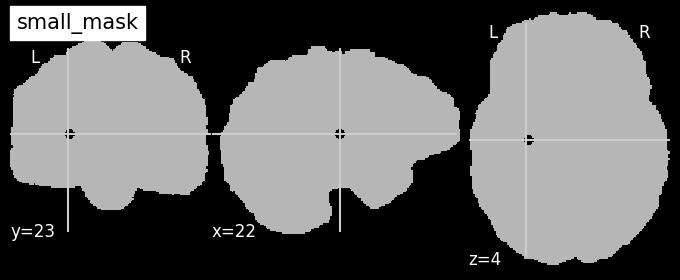

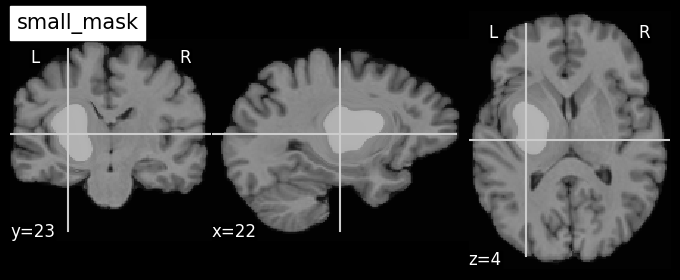

In [1]:
from nilearn.plotting import plot_anat
from nilearn.image import new_img_like,load_img
import nibabel as nib
from nibabel.processing import resample_from_to


mri = '/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/IXI031-Guys-0797_t1.nii.gz'
no_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/tough_case/mri_no_lesion.nii.gz'
small_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/tough_case/mri_initial_lesion.nii.gz'
mask = '/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/tough_case/lesion_small_mask.nii.gz'
large_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/tough_case/mri_expanded_lesion.nii.gz'

mri_img = nib.load(mri)
mri_no = nib.load(no_lesion)
small = nib.load(small_lesion)
small_mask = nib.load(mask)
mri_large =nib.load(large_lesion)


cross_hair = (22, 23, 4)
plot_anat(mri_img, title='t1', cut_coords=cross_hair)
plot_anat(mri_no , title='no_lesion', cut_coords=cross_hair)
plot_anat(small , title='small', cut_coords=cross_hair)
plot_anat(small_mask , title='small_mask', cut_coords=cross_hair)
plot_anat(mri_large , title='small_mask', cut_coords=cross_hair)


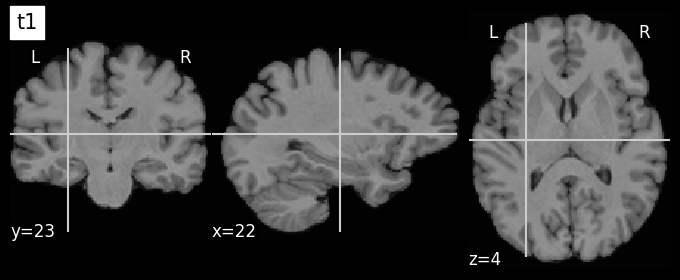

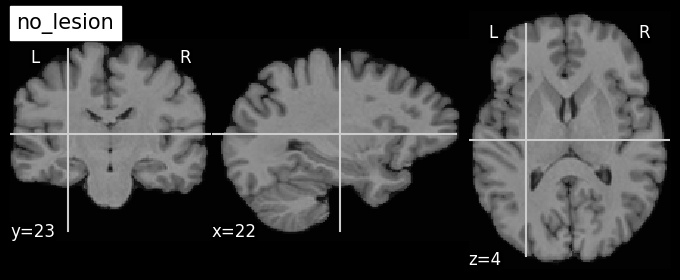

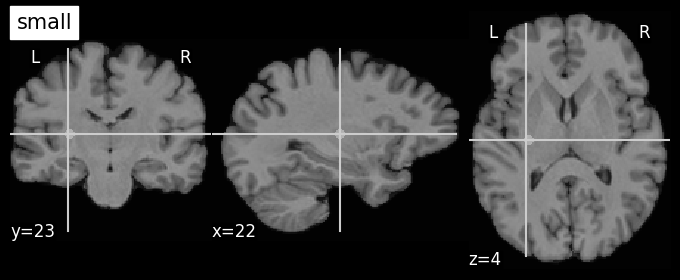

In [11]:
from nilearn.plotting import plot_anat
from nilearn.image import new_img_like,load_img
import nibabel as nib
from nibabel.processing import resample_from_to


mri = '/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/IXI031-Guys-0797_t1.nii.gz'
no_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/tough_case/mri_no_lesion.nii.gz'
small_lesion ='/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/tough_case/mri_initial_lesion.nii.gz'


mri_img = nib.load(mri)
mri_no = nib.load(no_lesion)
small = nib.load(small_lesion)


cross_hair = (22, 23, 4)
plot_anat(mri_img, title='t1', cut_coords=cross_hair)
plot_anat(mri_no , title='no_lesion', cut_coords=cross_hair)
plot_anat(small , title='small', cut_coords=cross_hair)


In [3]:
print(mri_img.shape)
print(mri_no.shape)

(137, 175, 137)
(137, 175, 137)


In [14]:
import os
import pandas as pd
base_dir = '/Test/BioBank/t1/'
t1_dir = '/project/ajoshi_27/akrami/3D_lesion_DF/preprocessing/simulated_lesion/'
cases = ['easy_case', 'tough_case']
file_names = 'mri_expanded_lesion.nii.gz'
healthy = 'mri_no_lesion.nii.gz'
mask_name ='IXI031-Guys-0797_mask.nii.gz'
lesion_small='lesion_small_mask.nii.gz'
lesion_large='lesion_large_mask.nii.gz'
file_healthy=[]
img_path=[]
mask_path =[]
seg_path =[]
seg_path_init=[]

for case in cases:
    file_healthy.append(t1_dir+case+'/'+healthy)
    img_path.append(t1_dir+case+'/'+file_names)
    mask_path.append(t1_dir+case+'/'+mask_name)
    seg_path.append(t1_dir+case+'/'+lesion_large)
    seg_path_init.append(t1_dir+case+'/'+lesion_small)
    
df = pd.DataFrame(img_path, columns=["img_path"])
df['img_name'] = cases
df['mask_path'] =mask_path
df['healthy'] =file_healthy
df['age'] = 50
df['seg_path'] = seg_path
df['seg_path_init'] = seg_path_init
csv_file_path = "/project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/simulated.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# print(f"DataFrame has been saved to {csv_file_path}")


In [ ]:
import os
import pandas as pd
base_dir = '/Train/BioBank/BioBank/t1/'
t1_dir = 'Data_train//Train/BioBank/BioBank/t1/'
file_names = [name for name in os.listdir(t1_dir)]
df = pd.DataFrame(file_names, columns=["img_path"])
df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))
# Extract the ID (removing the '_t1.nii' part) and add it as a new column
df['img_name'] = df['img_path'].apply(lambda x: os.path.basename(x).replace('_t1.nii.gz', ''))
# Update the DataFrame to include a new column 'mask_path'
df['mask_path'] = df['img_path'].apply(lambda x: x.replace('t1', 'mask'))
df['age'] = 50
csv_file_path = "Data/splits/BioBank_val.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")


In [1]:
import os
import pandas as pd

base_dir = '/Test/BioBank/t1/'
t1_dir = 'Data_train/Test/BioBank/t1/'

# Read the existing CSV to get the list of already added image paths
existing_df = pd.read_csv('BioBank_train.csv')
existing_img_paths = existing_df['img_path'].tolist()

file_names = [name for name in os.listdir(t1_dir) if os.path.join(base_dir, name) not in existing_img_paths]

df = pd.DataFrame(file_names, columns=["img_path"])
df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))

# Extract the ID (removing the '_t1.nii' part) and add it as a new column
df['img_name'] = df['img_path'].apply(lambda x: os.path.basename(x).replace('_t1.nii.gz', ''))

# Update the DataFrame to include a new column 'mask_path'
df['mask_path'] = df['img_path'].apply(lambda x: x.replace('t1', 'mask'))

df['age'] = 50
csv_file_path = "Data/splits/BioBank_val.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'BioBank_train.csv'

In [2]:
import os
import pandas as pd
base_dir = '/Train/CamCan/t1/'
t1_dir = '/scratch1/akrami/Data_train/Train/CamCan/t1/'
file_names = [name for name in os.listdir(t1_dir)]
df = pd.DataFrame(file_names, columns=["img_path"])
df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))
# Extract the ID (removing the '_t1.nii' part) and add it as a new column
df['img_name'] = df['img_path'].apply(lambda x: os.path.basename(x).replace('_t1.nii.gz', ''))
# Update the DataFrame to include a new column 'mask_path'
df['mask_path'] = df['img_path'].apply(lambda x: x.replace('t1', 'mask'))
df['age'] = 50
csv_file_path = "/project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/CamCan.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")


DataFrame has been saved to /project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/CamCan.csv


In [6]:
import os
import pandas as pd
base_dir = '/Train/HCP/t1/'
t1_dir = '/scratch1/akrami/Data_train/Train/HCP/t1/'
file_names = [name for name in os.listdir(t1_dir)]
df = pd.DataFrame(file_names, columns=["img_path"])
df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))
# Extract the ID (removing the '_t1.nii' part) and add it as a new column
df['img_name'] = df['img_path'].apply(lambda x: os.path.basename(x).replace('_t1.nii.gz', ''))
# Update the DataFrame to include a new column 'mask_path'
df['mask_path'] = df['img_path'].apply(lambda x: x.replace('t1', 'mask'))
df['age'] = 50
csv_file_path = "/project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/HCP.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")


DataFrame has been saved to /project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/HCP.csv


In [7]:
import pandas as pd
base_dir = '/project/ajoshi_27/akrami/3D_lesion_DF/Data/splits/'
# List of CSV files to be combined
csv_files = [base_dir+'HCP.csv', base_dir+"BioBank_train.csv", base_dir+"IXI_train_fold0.csv", base_dir+"CamCan.csv"]

# Read each CSV file into a DataFrame and store them in a list
dfs = [pd.read_csv(file) for file in csv_files]

# Combine the DataFrames by rows
combined_df = pd.concat(dfs, axis=0, ignore_index=True)

# Save the combined DataFrame to a new CSV file (optional)
combined_df.to_csv("combined_4datasets.csv", index=False)

print("CSV files have been combined and saved to combined.csv")


CSV files have been combined and saved to combined.csv
